In [62]:
import numpy as np

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [75]:
templates_solvent_additive = {
    "cyclic_carbonate": "[1*]C([2*])1C([1*])([2*])OC(=O)O1",
    "linear_carbonate": "[1*]OC(=O)O[2*]",
    "glyme": "C([1*])([2*])([3*])OC([4*])([5*])C([4*])([5*])OC([1*])([2*])([3*])",
    "carboxylate": "C([1*])([2*])([3*])OC(=O)[4*]",
    "thf": "C([1*])([2*])1C([1*])([2*])C([3*])([4*])OC([3*])([4*])1",
    "cyclic sulfate": "C([1*])([2*])1C([1*])([2*])OS(=O)(=O)O1", 
    "sulfone": "[1*]S(=O)(=O)[2*]",
    "sultone": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])S(=O)(=O)OC([7*])([8*])1",
    "sulfite_ester": "[1*]OS(=O)O[2*]",
    "cyclic_sulfite_ester": "C1([1*])([2*])OS(=O)OC([3*])([4*])C([3*])([4*])C1([1*])([2*])",
    "sulfonyl_fluoride": "[1*]S(F)(=O)=O",
    "sulfamoyl_fluoride": "N([1*])([2*])S(=O)(=O)F",
    "dinitrile": "N#CC([1*])([2*])C([1*])([2*])C#N",
    "carbamate": "[1*]OC(=O)N([2*])([3*])",
    "methoxyalkylamine": "C([3*])([4*])([5*])OC([6*])([7*])C([8*])([9*])N([1*])([2*])",
    "phosphine": "P([1*])([2*])([3*])",
    "phosphorane": "P([1*])([2*])([3*])([4*])([5*])",
    "organophosphate": "P(=O)(O[1*])(O[1*])(O[1*])",
    "silane": "[Si]([1*])([2*])([3*])([4*])",
    "siloxane": "O([Si]([1*])([2*])[3*])[Si]([1*])([2*])[3*]",
    "borane": "B([1*])([2*])[3*]",
    "boroxine": "O1B([1*])OB([1*])OB([1*])1",
}

templates_ions = {
    "sulfonylimide": "[1*]S(=O)(=O)[N-]S(=O)(=O)[1*]",
    "organosulfate": "O=S(=O)([O-])O[1*]",
    "cyclic_borate": "O1C([3*])([4*])C(O[B-]([1*])([2*])1)([3*])([4*])",
    "cyclic_aluminate": "O1C([3*])([4*])C(O[Al-]([1*])([2*])1)([3*])([4*])",
    "cyclic_phosphate": "O1C([5*])([6*])C(O[P-]([1*])([2*])([3*])([4*])1)([5*])([6*])",
}

templates_redox_flow = {
    "anthraquinone": "O=C1c2c([1*])c([2*])c([2*])c([1*])c2C(=O)c3c([1*])c([2*])c([2*])c([1*])c13",
    "naphthoquinone": "O=C1c2c([1*])c([2*])c([2*])c([1*])c2C(=O)c([3*])c([3*])1",
    "benzoquinone": "C1([1*])=C([1*])C(=O)C([1*])=C([1*])C1=O",
    "tempo": "CC1(CC([1*])([2*])CC(N1[O])(C)C)C",
    "phthalimide": "O=C2c1c([2*])c([3*])c([3*])c([2*])c1C(=O)N([1*])2",
    "viologen": "[1*][n+]1ccc(cc1)c2cc[n+](cc2)[1*]",
    "quinoxaline": "c([1*])1c([2*])c([2*])c([1*])c2nc([3*])c([3*])nc12",
    "tetrazine": "C([1*])1=NN=C([1*])N=N1",
    "benzothiadizaole": "C([1*])1=C([2*])C2=NSN=C2C([2*])=C([1*])1",
    "pyridine_ester": "c(C(=O)(O[1*]))1c([3*])c([4*])[n+]([2*])c([4*])c([3*])1",
    "cyclopropenium": "[C+](N([1*])([2*]))2C(N([1*])([2*]))=C(N([1*])([2*]))2",
    "ptio": "[1*]C1(C([N+](=C(N1[O])C2=C([3*])C([4*])=C([5*])C([4*])=C([3*])2)[O-])([2*])[1*])[2*]",
    "phenothiazine": "c([4*])1c([3*])c([2*])c2c(c1([5*]))N([1*])c3c([5*])c([4*])c([3*])c([2*])c3S2",
}

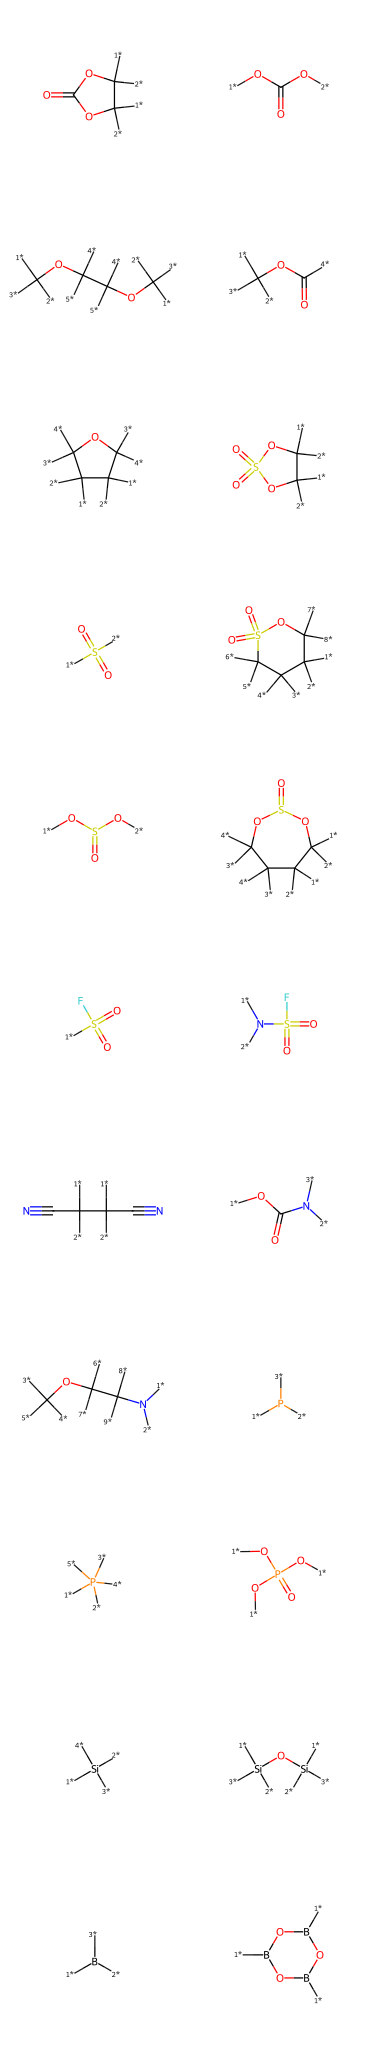

In [68]:
solvent_smiles = list()
for v in templates_solvent_additive.values():
    solvent_smiles.append(v)

solvent_smiles = np.asarray(solvent_smiles).reshape((11, 2)).tolist()
solvent_mols = [[Chem.MolFromSmiles(x) for x in row] for row in solvent_smiles]
Chem.Draw.MolsMatrixToGridImage(solvent_mols, subImgSize=(300, 300))

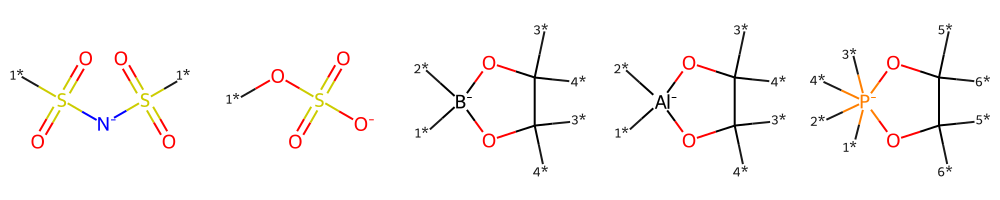

In [76]:
ions_smiles = list()
for v in templates_ions.values():
    ions_smiles.append(v)

ions_smiles = np.asarray(ions_smiles).tolist()
ions_mols = [[Chem.MolFromSmiles(x) for x in ions_smiles]]
Chem.Draw.MolsMatrixToGridImage(ions_mols, subImgSize=(200, 200))

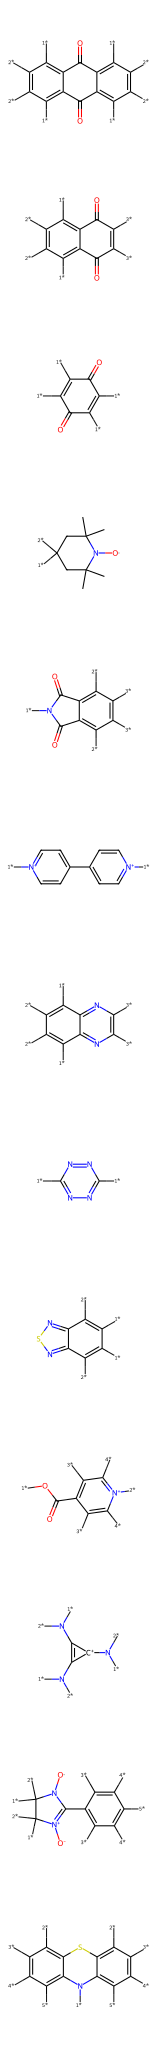

In [74]:
redox_smiles = list()
for v in templates_redox_flow.values():
    redox_smiles.append(v)

redox_smiles = np.asarray(redox_smiles).reshape((13, 1)).tolist()
redox_mols = [[Chem.MolFromSmiles(x) for x in row] for row in redox_smiles]
Chem.Draw.MolsMatrixToGridImage(redox_mols, subImgSize=(300, 300))